In [1]:
#import library
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  recall_score


In [2]:

df = pd.read_csv('FOOD-DATA-GROUP5.csv')

print(df.head())
print(df.info())
print(df.describe())

# # Tăng chiều rộng và hiển thị đầy đủ các cột
# pd.set_option('display.max_columns', None)  # Không giới hạn số lượng cột
# pd.set_option('display.width', 1000)       # Tăng chiều rộng dòng hiển thị
# pd.set_option('display.max_colwidth', None)  # Không giới hạn độ dài của cột văn bản

#ktra du lieu thieu
print(df.isnull().sum())

   Unnamed: 0.1  Unnamed: 0                    food  Caloric Value    Fat  \
0             0           0  margarine with yoghurt             88    9.8   
1             1           1   sunflower seed butter             99    8.8   
2             2           2            hazelnut oil            120   13.6   
3             3           3       menhaden fish oil           1966  218.0   
4             4           4      cod liver fish oil            123   13.6   

   Saturated Fats  Monounsaturated Fats  Polyunsaturated Fats  Carbohydrates  \
0             1.9                   5.6                   2.0          0.073   
1             0.7                   6.2                   1.6          3.700   
2             1.0                  10.6                   1.4          0.000   
3            66.3                  58.2                  74.5          0.000   
4             3.1                   6.4                   3.1          0.000   

   Sugars  ...  Calcium  Copper   Iron  Magnesium  Manga

In [3]:

# Tách các cột số cần chuẩn hóa (nếu không được chỉ định, tự động chọn tất cả các cột số)
numeric_columns = [
    'Caloric Value', 'Fat', 'Carbohydrates', 'Sugars', 'Protein',
    'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water',
    'Calcium', 'Iron', 'Magnesium', 'Manganese' , 'Selenium', 
    'Phosphorus', 'Potassium', 'Zinc' , 
]

epsilon = 1e-3  # Giá trị nhỏ để thay thế 0
df[numeric_columns] = df[numeric_columns].replace(0, epsilon) # Xử lý các giá trị bằng 0

# Chuẩn hóa bằng Min-Max Scaling
scaler = MinMaxScaler()
food_data= df[numeric_columns].copy()
food_data[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Hiển thị dữ liệu
print("Dữ liệu sau khi chuẩn hóa (Min-Max Scaling):")
print(food_data.head())

Dữ liệu sau khi chuẩn hóa (Min-Max Scaling):
   Caloric Value       Fat  Carbohydrates    Sugars   Protein  Dietary Fiber  \
0       0.026379  0.044950       0.000379  0.000000  0.000664       0.000000   
1       0.029676  0.040363       0.019458  0.016181  0.032623       0.015342   
2       0.035971  0.062381       0.000000  0.000000  0.000000       0.000000   
3       0.589328  1.000000       0.000000  0.000000  0.000000       0.000000   
4       0.036870  0.062381       0.000000  0.000000  0.000000       0.000000   

   Cholesterol    Sodium     Water   Calcium      Iron  Magnesium  Manganese  \
0     0.000000  0.000344  0.005346  0.003225  0.000890   0.000400   0.000000   
1     0.000000  0.001296  0.000136  0.011750  0.023939   0.066683   0.000663   
2     0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
3     1.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
4     0.068233  0.000000  0.000000  0.000000  0.000000   0.000000   0.0000

               Heart Disease Risk  Diabetes Risk  Cancer Risk  Gout Risk  \
Caloric Value            0.223858       0.082910     0.492988   0.430377   
Fat                      0.339160      -0.021959     0.759982   0.238531   
Carbohydrates           -0.021936       0.258540    -0.049154   0.294636   
Sugars                  -0.011811       0.777015    -0.026466  -0.020114   
Protein                 -0.015561      -0.017389    -0.034869   0.784430   
Dietary Fiber           -0.015670       0.047338    -0.035114   0.441018   
Cholesterol              0.731194      -0.012893     0.318980   0.375050   
Sodium                  -0.004794       0.000628    -0.010743  -0.011911   
Water                   -0.024043       0.091060    -0.053874   0.074056   
Calcium                 -0.015308       0.013891    -0.034302   0.330568   
Iron                    -0.015821       0.031706    -0.035452   0.614206   
Magnesium               -0.013503       0.006414    -0.030256   0.538372   
Manganese   

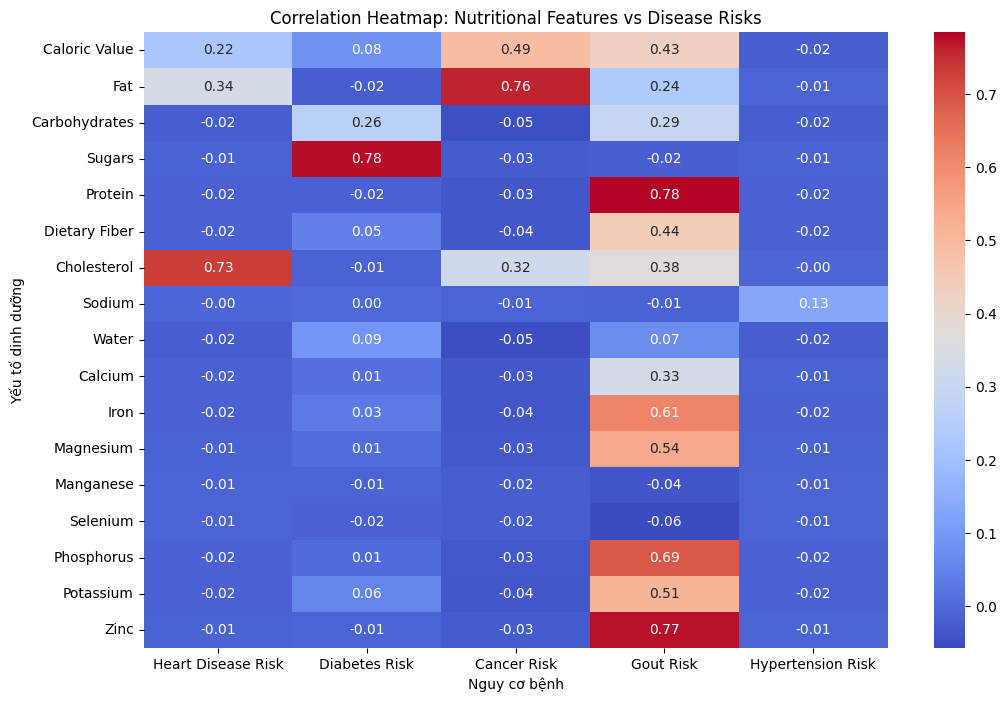

In [4]:
# Giả định các ngưỡng bệnh cho dữ liệu
# Quy đổi các ngưỡng cho dữ liệu chuẩn hóa (khoảng [0, 1])
food_data['Heart Disease Risk'] = ((food_data['Cholesterol'] > 0.66) & (food_data['Fat'] > 0.5)).astype(int) 
food_data['Diabetes Risk'] = ((food_data['Sugars'] > 0.5) & (food_data['Carbohydrates'] > 0.07)).astype(int) 
food_data['Cancer Risk'] = ((food_data['Fat'] > 0.67) & (food_data['Protein'] < 0.3)).astype(int)  
food_data['Gout Risk'] = ((food_data['Protein'] > 0.5)).astype(int)  
food_data['Hypertension Risk'] = ((food_data['Sodium'] > 0.04) & (food_data['Calcium'] < 0.02)).astype(int) 

# Chọn các cột dinh dưỡng và nguy cơ bệnh
nutritional_features = ['Caloric Value', 'Fat', 'Carbohydrates', 'Sugars', 'Protein',
                        'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water',
                        'Calcium', 'Iron', 'Magnesium', 'Manganese' , 'Selenium', 
                        'Phosphorus', 'Potassium', 'Zinc']
disease_columns = ['Heart Disease Risk', 'Diabetes Risk', 'Cancer Risk', 'Gout Risk', 'Hypertension Risk']
# Lọc dữ liệu
subset = food_data[nutritional_features + disease_columns]

# Nếu có NaN, có thể loại bỏ các dòng chứa NaN hoặc điền giá trị thiếu
subset_cleaned = subset.dropna()  # Loại bỏ các dòng chứa NaN

# Tính ma trận tương quan
correlation_matrix = subset_cleaned.corr().loc[nutritional_features, disease_columns]
print(correlation_matrix)

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Nutritional Features vs Disease Risks')
plt.xlabel('Nguy cơ bệnh')
plt.ylabel('Yếu tố dinh dưỡng')
plt.show()


In [5]:

# Chọn mục tiêu và yếu tố dự đoán
X = food_data[nutritional_features]
y = food_data['Cancer Risk']  # bệnh ung thư 

# Chọn 5 yếu tố quan trọng nhất
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Xem các yếu tố quan trọng
important_features = selector.get_support(indices=True)
print("Các yếu tố quan trọng nhất ảnh hưởng tới bệnh Cancer:", [nutritional_features[i] for i in important_features])

Các yếu tố quan trọng nhất ảnh hưởng tới bệnh Cancer: ['Caloric Value', 'Fat', 'Carbohydrates', 'Cholesterol', 'Water']


In [7]:
# Biến mục tiêu : Một trong các cột nguy cơ bệnh
# Biến dự đoán : Các cột chứa thông tin dinh dưỡng 
# Xác định biến mục tiêu và biến dự đoán
target_Cancer_Disease = 'Cancer Risk'  
features_Cancer_Disease = ['Caloric Value', 'Fat', 'Carbohydrates', 'Cholesterol', 'Water']  

X_Cancer = food_data[features_Cancer_Disease]
print("Tập kiểm thử X_heart : \n", X_Cancer)
y_Cancer = food_data[target_Cancer_Disease]
print("Tập kiểm thử y_heart : \n", y_Cancer)



Tập kiểm thử X_heart : 
      Caloric Value       Fat  Carbohydrates  Cholesterol     Water
0         0.026379  0.044950       0.000379     0.000000  0.005346
1         0.029676  0.040363       0.019458     0.000000  0.000136
2         0.035971  0.062381       0.000000     0.000000  0.000000
3         0.589328  1.000000       0.000000     1.000000  0.000000
4         0.036870  0.062381       0.000000     0.068233  0.000000
..             ...       ...            ...          ...       ...
949       0.069244  0.015592       0.240396     0.000000  0.006992
950       0.037170  0.011005       0.023667     0.000000  0.000000
951       0.039268  0.003665       0.169380     0.000000  0.001918
952       0.073441  0.027060       0.243026     0.000000  0.003564
953       0.032374  0.001372       0.129401     0.000000  0.001233

[954 rows x 5 columns]
Tập kiểm thử y_heart : 
 0      0
1      0
2      0
3      1
4      0
      ..
949    0
950    0
951    0
952    0
953    0
Name: Cancer Risk, Leng

In [8]:

# Chia nhỏ mô hình cho tập
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_Cancer, y_Cancer, test_size=0.5, random_state=42)  
print("Kích thước tập huấn luyện:", X_train_cancer.shape)
print("Kích thước tập kiểm thử:", X_test_cancer.shape)

Kích thước tập huấn luyện: (477, 5)
Kích thước tập kiểm thử: (477, 5)


In [9]:
# Khởi tạo mô hình
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Đào tạo mô hình
decision_tree.fit(X_train_cancer, y_train_cancer)
random_forest.fit(X_train_cancer, y_train_cancer)

print("Mô hình Decision Trees và Random Forests đã được huấn luyện cho nguy cơ mắc bệnh ung thư.")

Mô hình Decision Trees và Random Forests đã được huấn luyện cho nguy cơ mắc bệnh ung thư.


In [10]:
# Dự đoán trên tập kiểm thử
y_pred_dt = decision_tree.predict(X_test_cancer)
y_pred_rf = random_forest.predict(X_test_cancer)

# Tính các chỉ số đánh giá (tránh lỗi bằng zero_division)
accuracy_dt = accuracy_score(y_test_cancer, y_pred_dt)
sensitivity_dt = recall_score(y_test_cancer, y_pred_dt, pos_label=1, zero_division=0)
specificity_dt = recall_score(y_test_cancer, y_pred_dt, pos_label=0, zero_division=0)

accuracy_rf = accuracy_score(y_test_cancer, y_pred_rf)
sensitivity_rf = recall_score(y_test_cancer, y_pred_rf, pos_label=1, zero_division=0)
specificity_rf = recall_score(y_test_cancer, y_pred_rf, pos_label=0, zero_division=0)

# In kết quả
print("Đánh giá mô hình Decision Trees:")
print(f"Độ chính xác: {accuracy_dt}")
print(f"Độ nhạy: {sensitivity_dt}")
print(f"Độ đặc hiệu: {specificity_dt}")

print("\nĐánh giá mô hình Random Forests:")
print(f"Độ chính xác: {accuracy_rf}")
print(f"Độ nhạy: {sensitivity_rf}")
print(f"Độ đặc hiệu: {specificity_rf}")

# Kiểm tra nhãn và chỉ định đầy đủ nhãn trong ma trận nhầm lẫn
unique_labels = sorted(set(y_test_cancer) | set(y_pred_dt) | set(y_pred_rf))  # Tập hợp tất cả các nhãn


Đánh giá mô hình Decision Trees:
Độ chính xác: 1.0
Độ nhạy: 1.0
Độ đặc hiệu: 1.0

Đánh giá mô hình Random Forests:
Độ chính xác: 1.0
Độ nhạy: 1.0
Độ đặc hiệu: 1.0


In [11]:

# Tính toán độ quan trọng của các yếu tố
# Tính toán độ quan trọng của các thuộc tính
importances = random_forest.feature_importances_  
# Sử dụng các tên cột từ tập dữ liệu huấn luyện
feature_importance = pd.DataFrame({'Feature': X_train_cancer.columns, 'Importance': importances}) 
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Hiển thị kết quả dưới dạng bảng
print("Độ quan trọng của các yếu tố dinh dưỡng và hành vi:")
print(feature_importance)



Độ quan trọng của các yếu tố dinh dưỡng và hành vi:
         Feature  Importance
1            Fat    0.506301
0  Caloric Value    0.454491
4          Water    0.020711
2  Carbohydrates    0.018055
3    Cholesterol    0.000442


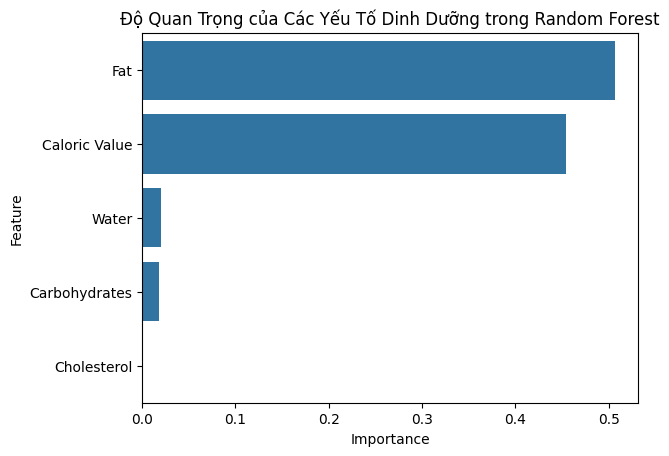

In [12]:
# Vẽ biểu đồ độ quan trọng
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Độ Quan Trọng của Các Yếu Tố Dinh Dưỡng trong Random Forest')
plt.show()